## Objetivos



**As metas desse tutorial são:**
- Fazer uma breve revisão sobre caracterização de canal;
- Caracterizar o desvanecimento de larga escala **(PathLoss e Shadowing)** e pequena escala **(Multpath e Doppler)**;
- Apresentar métodos de estimação da frequência **Doppler**, _Level Crossing Rate (LCR) e Average Fading Duration_(AFD). 

## Sistema de comunicação móvel

Os sistemas de redes de comunicações móveis veem se destacando há muito tempo, mas sempre possuem o desafio de vencer os intempéries do meio de propagação.
Destaca-se principalmente o desvanecimento proveniente da distância entre o Tx e o RX, o espalhamento e o bloqueio do sinal decorrente dos objetos que ficam entre ambos, e por último, a defasagem devido a mobilidade do transmissor, receptor ou ambos.
Dessa forma,impõe-se a necessidade de se estudar com mais profundidade os parâmetros que caracterizam um canal radio
móvel.
Tradicionalmente, os modelos de propagação tem focado na predição de uma intensidade média do sinal rebebido a uma  determinada distância do transmissor, além da variabilidade da intensidade do sinal. 

O conhecimento do canal permite ao projetista, ou até mesmo ao sistema de maneira
autônoma, conhecer a principal barreira a se vencer para o sucesso na transmissão da
informação. Teoricamente, ao se conhecer com precisão as características do canal, é
possível explorar por completo a capacidade do enlace de comunicação

## Desvanecimento Larga Escala (_PathLoss_) e o Sombreamento (_Shadowing_)

O **_PathLoss_** é a variação da intensidade do sinal decorrente da distância entre o Tx e o Rx.
Esse desvanecimento de larga escala possui caracteristicas que varia de acordo com o sistema irradiante, frequência de operação, clima e etc.
Além disso, o sinal sofre variações aleatórias que são ocasionadas pelos obstáculos que  presentes no meio de propagação, entre transmissor e receptor, gerando um sobreamento, **_Shadowing_**, do sinal recebido.
Existem vários estudos e modelos de predição do expoente da perda de percurso e desvio padrão de sombreamento.
A figura abaixo, ilustra os fenômenos.


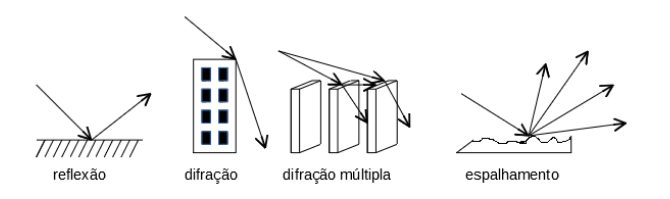

A equação que modela o **_PathLoss_** e o **_Shadowing_**:
- d0 é uma distância referência;
- d distância entre transmissor e receptor.
- n expoente de perda de percurso (medido empíricamente, depende do meio);
- Xσ é uma variável aleatória que representa o sombreamento log-normal e tem como principal parâmetro o desvio padrão σ.

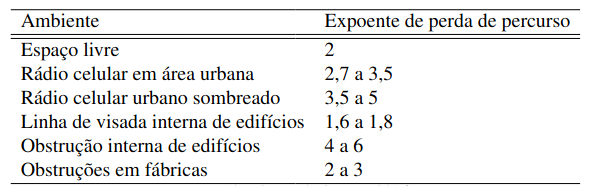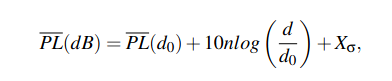

## Desvanecimento de Pequena Escala (_MultPath_) e o _Doppler_

Quando nos deparamos com mudanças bruscas e rápidas na intensidade do sinal, fase e atraso, estamos tratando do desvanecimento de pequena escala. Ele ocorre devido os múltiplos caminhos que o sinal percorre até o receptor.
Quando existe movimento do Tx e/ou Rx, o sinal passa sofrer efeito do espalhamento _Doppler_.
Os efeitos que esses fenômenos, **_MultiPath e Doppler_**, causam no sinal, podem ser sintetizados resume 
- Dispersão do sinal no tempo causado pelo atraso de propagação dos _multpaths_;
- Dispersão do sinal em frequência devido ao efeito _Doppler_;
- Possível interferência inter-simbólica (ISI);
- Redução na Relação Sinal-Ruído (SNR).


A figura abaixo ilustra os fenômenos citados.
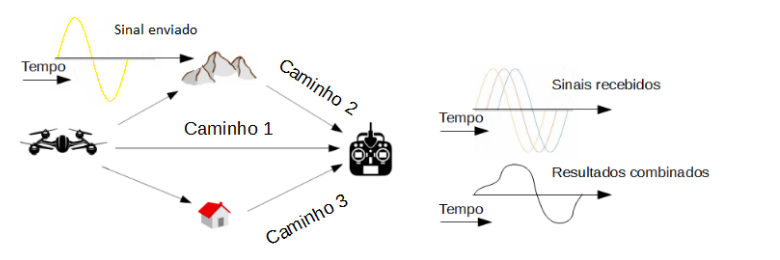

A caracterização do desvanecimento de pequena escala é feita por estatísticas de
segunda ordem, sendo elas:
- _LCR - Level Crossing Rate_; 
- _AFD - Average Fade Duration_, \
comumente utilizadas para caracterizar o efeito Doppler nos canais móveis.

## _Level Crossing Rate_ (LCR) e _Average Fading Duration_(AFD)

A taxa de cruzamento de nível, **LCR**, é a medida do número médio de vezes que um sinal cruza um determinado limiar no sentido positivo.
- **r** é as amostras do desvanecimento Rayleigh;
- **_fd_** é a frequência _Doppler_;
- **NRayleigh(ρ)** = **LCR** é expresso em cruzamentos por segundo.

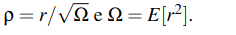

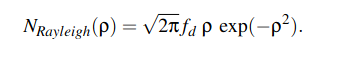

A duração média de desvanecimento, **AFD**, é a medição do tempo médio sobre o qual o sinal está abaixo de um determinado limiar. \
A **AFD** é expresso na unidade (m/s) e dado pela equação abaixo:



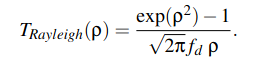

- _ρ = R/Rrms_ é o valor do nível de amplitude;
- _R_ é normalizado para a amplitude rms local do envelope de desvanecimento;
- O valor _Rrms_ é baseado na distribuição _Rayleigh_ do envelope de sinal recebido.



Com os valores obtidos acima, torna-se possível calcular a _frequência Doppler estimada_ pela equação abaixo:

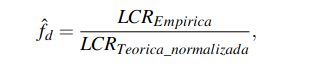
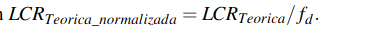

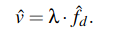

Tanto o **LCR** quanto o **AFD** podem ser usados para projetar o formato de sinalização/esquema de diversidade para sistemas celulares com qualidade, pois um canal que apresenta
um elevado valor de **AFD** tem influência direta na quantidade de pacotes recebidos
com erros.


**É importante deixar claro que essas equações referem-se ao cálculo das estatísticas de
segunda ordem para um determinado nível de potência. Assim, para cada nível calculado
haverá um valor para** $ f_d $  

# Prática 1:  Caracterização do canal em função do desvanecimento de larga escala (perda de percurso e sombreamento)

**Passo 1: Geração do Canal Sintético**


Canal sintético:
   Média do sombreamento: 0.42888
   Std do sombreamento: 5.9185
   Janela de correlação do sombreamento: 200 amostras
   Expoente de path loss: 4
   m de Nakagami: 4


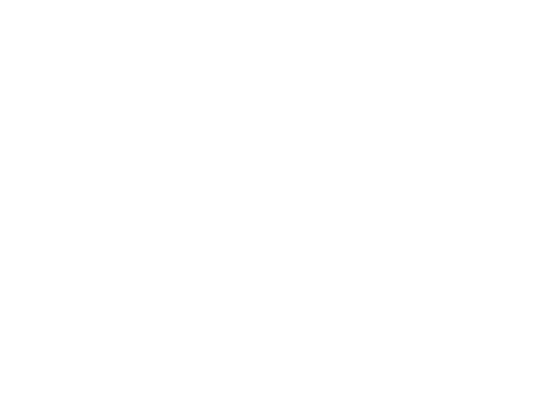

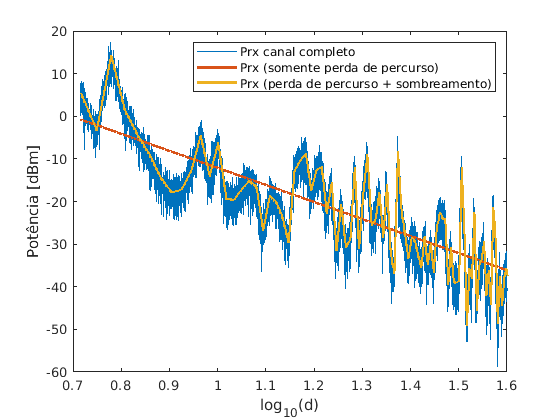

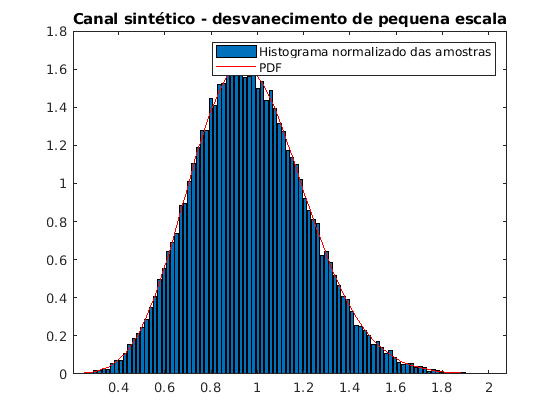

In [60]:
clear, clf
% Parâmetros para geração do canal sintético
sPar.d0 = 5;                     % distância de referência d0
sPar.P0 = 0;                     % Potência medida na distância de referência d0
sPar.nPoints = 50000;            % Número de amostras da rota de medição
sPar.totalLength = 100;          % Distância final da rota de medição
sPar.n = 4;                      % Expoente de perda de percurso
sPar.sigma = 6;                  % Desvio padrão do shadowing em dB
sPar.shadowingWindow = 200;      % Tamanho da janela de correlação do shadowing (colocar em função da distância de correlação)
sPar.m = 4;                      % Parâmetro de Nakagami
sPar.txPower = 0;                % Potência de transmissão em dBm
sPar.nCDF = 40;                  % Número de pontos da CDF normalizada
sPar.chFileName  = 'Prx_sintetico';
% Distância entre pontos de medição
sPar.dMed = sPar.totalLength/sPar.nPoints;
% Vetor de distâncias do transmissor (além da distância de referência)
vtDist = sPar.d0:sPar.dMed:sPar.totalLength;
% Número de amostras geradas
nSamples = length(vtDist);
% Geração da Perda de percurso (determinística)
vtPathLoss = sPar.P0 + 10*sPar.n*log10(vtDist./sPar.d0);
% Geração do Sombreamento (V.A. Gaussiana com média zero e desvio padrão sigma)
nShadowSamples = floor(nSamples/sPar.shadowingWindow);
vtShadowing = sPar.sigma*randn(1,nShadowSamples);
% Amostras para a última janela
restShadowing = sPar.sigma*randn(1,1)*ones(1,mod(nSamples,sPar.shadowingWindow));
% Repetição do mesmo valor de sombreamento durante a janela de correlação
vtShadowing = ones(sPar.shadowingWindow,1)*vtShadowing;
% Amostras organizadas em um vetor
vtShadowing = [reshape(vtShadowing,1,nShadowSamples*sPar.shadowingWindow),restShadowing];
% Filtragem para evitar variação abrupta do sombreamento (filtro média móvel)
% O sombreamento tem menos "2*jan" amostras devido a filtragem
jan = sPar.shadowingWindow/2;
iCont = 1;
for i = jan+1:nSamples-jan,
    vtShadCorr(iCont) = mean(vtShadowing(i-jan:i+jan));
    iCont = iCont+1;
end
% Ajuste do desvio padrão depois do filtro de correlação do sombreamento
vtShadCorr = vtShadCorr*std(vtShadowing)/std(vtShadCorr);
vtShadCorr = vtShadCorr - mean(vtShadCorr)+ mean(vtShadowing);
%
% Geração do desvanecimento de pequena escala: Nakagami fading
% PDF da envolvtória normalizada
fpNakaPdf = @(x)((2.*sPar.m.^sPar.m)./(gamma(sPar.m))).*x.^(2.*sPar.m-1).*exp(-(sPar.m.*x.^2));
% Gerador de números aleatórios com distribuição Nakagami
vtNakagamiNormEnvelope = slicesample(1,nSamples,'pdf',fpNakaPdf);
% Fading em dB (Potência)
vtNakagamiSampdB = 20.*log10(vtNakagamiNormEnvelope');
%
% Cálculo da Potência recebida
vtTxPower = sPar.txPower*ones(1,nSamples);
% Ajuste do número de amostras devido ao filtro de correlação do
% sombreamento (tira 2*"Jan" amostras)
vtTxPower = vtTxPower(jan+1:nSamples-jan);
vtPathLoss = vtPathLoss(jan+1:nSamples-jan);
vtFading = vtNakagamiSampdB(jan+1:nSamples-jan);
vtDist = vtDist(jan+1:nSamples-jan);
% Potência recebida
vtPrx = vtTxPower-vtPathLoss+vtShadCorr+vtFading;
%
% Salvamento dos dados
%    Para excel:
dlmwrite([sPar.chFileName '.txt'], [vtDist',vtPrx'], 'delimiter', '\t');
%    Matlab
save([sPar.chFileName '.mat'],'vtDist', 'vtPathLoss', 'vtShadCorr', 'vtFading', 'vtPrx');
%
% Mostra informações do canal sintético
disp('Canal sintético:')
disp(['   Média do sombreamento: ' num2str(mean(vtShadCorr)) ]);
disp(['   Std do sombreamento: ' num2str(std(vtShadCorr)) ]);
disp(['   Janela de correlação do sombreamento: ' num2str(sPar.shadowingWindow) ' amostras' ]);
disp(['   Expoente de path loss: ' num2str(sPar.n) ]);
disp(['   m de Nakagami: ' num2str(sPar.m) ]);
%
% Plot do desvanecimento de larga escala (gráfico linear)
figure;
% Log da distância
log_distancia = log10(vtDist);
% Potência recebida com canal completo
plot(log_distancia,vtPrx); hold all;
% Potência recebida com path loss
plot(log_distancia,sPar.txPower-vtPathLoss,'linewidth', 2)
% Potência recebida com path loss e shadowing
plot(log_distancia,sPar.txPower-vtPathLoss+vtShadCorr,'linewidth', 2)
%title('Canal sintético: Potência recebida no receptor vs. log da distância')
xlabel('log_{10}(d)');
ylabel('Potência [dBm]');
legend('Prx canal completo', 'Prx (somente perda de percurso)', 'Prx (perda de percurso + sombreamento)');
xlim([0.7 1.6])
%
% Plot da geração do desvanecimento Nakagami
figure;
[f,x] = hist(vtNakagamiNormEnvelope,100);
bar(x,f/trapz(x,f)); % Histograma normalizado = PDF (das amostras)
hold all;
plot(x,fpNakaPdf(x),'r'); % PDF da distribuição
title('Canal sintético - desvanecimento de pequena escala');
legend('Histograma normalizado das amostras','PDF');

# Parte 2:   Caracteriza o desvanecimento de pequena escala (Doppler e multipercurso)

O canal _outdoor_ será caracterizado principalmente pelo espectro Doppler e a variação do sinal no domínio tempo, ocasionada pelo fenômeno. Vários tipos de espectro Doppler podem ser realizados por um filtro modelo de ruído gaussiano branco (Filter White Gaussian Noise - FWGN). O modelo FWGN é um dos modelos de canais externos mais populares. Tomaremos como  modelo  o de **Clarke/Gans** por ser um modelo FWGN de linha de base que pode ser modificado em vários outros tipos, dependendo de como um filtro Doppler é implementado no domínio do tempo ou no domínio da frequência.

**Passo 01:** Abra um script no Matlab para gerar a função do modelo de filtragem, salve-o como **FWGN_model.m** e escreva o seguinte código:

In [61]:
%%file FWGN_model.m
%Gerando a função do modelo (Clark/Gan) FWGN
function [h,Nfft,Nifft,doppler_coeff]=FWGN_model(fm,fs,N)
% Input: fm= frequencia maxima Doppler
% fs= Frequencia de Amostragem, N = Numero de amostras
% Output: h = Canal de desvanecimento complexo
Nfft = 2^max(3,nextpow2(2*fm/fs*N)); % Nfft=2^n
Nifft = ceil(Nfft*fs/(2*fm));
% Gera o processo aleatório Gaussiano complexo independente
GI = randn(1,Nfft); 
GQ = randn(1,Nfft);
% Tirar FFT do sinal real para tornar o hermitiano simétrico
CGI = fft(GI); 
CGQ = fft(GQ);
% Geração de espectro Doppler de amostra Nfft
doppler_coeff = Doppler_spectrum(fm,Nfft);
% Filtragem das variáveis aleatórias Gaussianas 
f_CGI = CGI.*sqrt(doppler_coeff);
f_CGQ = CGQ.*sqrt(doppler_coeff);
% Ajuste o tamanho da amostra para obter IFFT por (Nifft-Nfft) preenchimento zero da amostra
Filtered_CGI=[f_CGI(1:Nfft/2) zeros(1,Nifft-Nfft) f_CGI(Nfft/2+1:Nfft)];
Filtered_CGQ=[f_CGQ(1:Nfft/2) zeros(1,Nifft-Nfft) f_CGQ(Nfft/2+1:Nfft)];
hI = ifft(Filtered_CGI); 
hQ= ifft(Filtered_CGQ);
%Somado a magnitude ao quadrado das componentes I e Q
rayEnvelope = sqrt(abs(hI).^2 + abs(hQ).^2);
% Calculando o valor quadrático médio da raiz e normalizando o envelope
rayRMS = sqrt(mean(rayEnvelope(1:N).*rayEnvelope(1:N)));
h = complex(real(hI(1:N)),-real(hQ(1:N)))/rayRMS;

Created file '/home/eriberto/EEC1731/codes_2022/LCR_AFD_matlab/FWGN_model.m'.


**Passo 02:** Abra um segundo script no Matlab para gerar a função de geração de Doppler, salve-o como **Doppler_spectrum.m** e escreva o seguinte código:

In [74]:
%%file Doppler_spectrum.m
%Gerando o Doppler
function y=Doppler_spectrum(fd,Nfft)
% fd = Maximum Doppler frequency
% Nfft= Número de pontos no domínio de frequência
df = 2*fd/Nfft; % Espaçamento entre frequências
% DC primeira componente
f(1) = 0; y(1) = 1.5/(pi*fd);
% Os outros componentes para um lado do espectro
for i = 2:Nfft/2
f(i)=(i-1)*df; % Índices de frequência para ajuste polinomial
y([i Nfft-i+2]) = 1.5/(pi*fd*sqrt(1-(f(i)/fd)^2));
end
% Ajuste polinomial aplicado à frequência de Nyquist usando as últimas 3 amostras
nFitPoints=3 ; 
kk=[Nfft/2-nFitPoints:Nfft/2];
polyFreq = polyfit(f(kk),y(kk),nFitPoints);
y((Nfft/2)+1) = polyval(polyFreq,f(Nfft/2)+df);

Created file '/home/eriberto/EEC1731/codes_2022/LCR_AFD_matlab/Doppler_spectrum.m'.


**Passo 03:** Abra um novo script no Matlab para gerar a função de geração do _Fading_, salve-o como **gerFading.m** e escreva o seguinte código:

**Para outros resultados, pode alterar os parâmetros abaixo da simulação** 
- speedKm;
- f, frequencia da portadora em MHz;
- ts, Taxa de amostragem; 
- numberSamples,Número de amostras.

**Atentar para o critério de Nyquist**  $f_s > 2B$  

> In polyfit (line 79)
  In Doppler_spectrum (line 16)
  In FWGN_model (line 18)


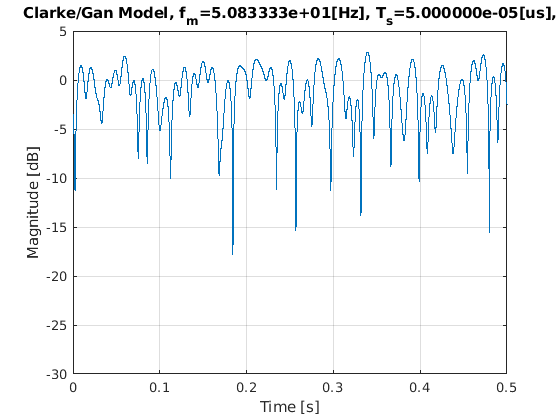

In [75]:
clc, clf % Geração do Fading 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%   Variáveis do experimento %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

speedKm = 60;
speedMs = speedKm/3.6;
c = 3e8; %Velocidade da luz (m/s)
f = 915e6; %frequencia da portadora em MHz
lambda = c/f; %Comprimento de onda (m)
dopplerMax = speedMs/lambda;
ts=50e-6; %Taxa de amostragem
fs=1/ts; %Frequencia de amostragem
numberSamples=1e6; %Número de amostras
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


[h,Nfft,Nifft,doppler_coeff] = FWGN_model(dopplerMax,fs,numberSamples);
save('Clarke');
figure (1); 
plot([1:numberSamples]*ts,10*log10(abs(h)))
str=sprintf('Clarke/Gan Model, f_m=%d[Hz], T_s=%d[us],',dopplerMax,ts);
title(str)
axis([0 0.5 -30 5])
ylabel('Magnitude [dB]')
xlabel('Time [s]')
grid on;

Perceba que o resultado obtido apresenta características no domínio do tempo do canal de desvanecimento não seletivo de frequência e que a variação da amplitude do canal torna-se mais significativa à medida que a frequência Doppler aumenta, demonstrando características de desvanecimento rápido.

# Estátisticas de segunda ordem - LCR e AFD

**Passo 04:** Abra um novo script no Matlab para gerar a função de cálculo do **LCR**, salve-o como **LCR_.m** e escreva o seguinte código:

In [64]:
%%file LCR_.m
%%Função de cálculo LCR

function [LCR] = LCR_(amostras, nivel, ts)
    AFD = 0;
    LCR = 0;  
    x=[];
for i=1:length(amostras)
      if (amostras(1,i) < nivel)
          x(i) = 1;
      else
        x(i) = 0;
      end
end

a=x;
    for i=length(amostras):-1:2
      if (x(i) == 1 && x(i-1) == 1)
          
        a(i - 1) = 0;
      end
    end
    
LCR = sum(a)/(ts*length(amostras));

Created file '/home/eriberto/EEC1731/codes_2022/LCR_AFD_matlab/LCR_.m'.


**Passo 05:** Abra um novo script no Matlab para gerar a função de contagem do **LCR**, salve-o como **ContandoLCR.m** e escreva o seguinte código:

In [65]:
%%file ContandoLCR.m
%%Cálculo da LCR (contando LCR)
filename = 'Clarke.mat';

delimiterIn = ' ';
headerlinesIn = 1;
B = importdata(filename,delimiterIn,headerlinesIn);
vtPrx2  = (B');
vtPrx2 = B.h;
thr1= -10:0.1:10;
 
for i = 1:length( thr1 )
        tmp2 = ( vtPrx2 > thr1(i) );
        tmp2 = diff( tmp2 );
        lcf2( i ) = sum( tmp2==1 );
end
%Plot do número de cruzamentos
figure
plot(thr1,lcf2)
grid minor
xlabel('dBm')
ylabel('Número de cruzamentos')
title('Desvanecimento de pequena escala')

Created file '/home/eriberto/EEC1731/codes_2022/LCR_AFD_matlab/ContandoLCR.m'.


**Passo 06:** Abra um novo script no Matlab para gerar a função de cálculo do **AFD**, salve-o como **AFD_.m** e escreva o seguinte código:

In [76]:
%%file AFD_.m
%%Cálculo AFD

function [AFD] = AFD_(amostras, nivel, ts)
    AFD = 0;
    LCR = 0;
    x=[];
for i=1:length(amostras)
      if (amostras(1,i) < nivel)
          x(i) = 1;
      else
        x(i) = 0;
      end
end
    
a=x;
    for i=length(amostras):-1:2
      if (x(i) == 1 && x(i-1) == 1)
        a(i - 1) = 0;
      end
    end    
AFD = sum(x)*ts/sum(a);


Created file '/home/eriberto/EEC1731/codes_2022/LCR_AFD_matlab/AFD_.m'.


Por último, iremos gerar o script principal. \
Então, abra mais um script no Matlab, salve-o como **mainLCRandAFD.m** e escreva o código abaixo:

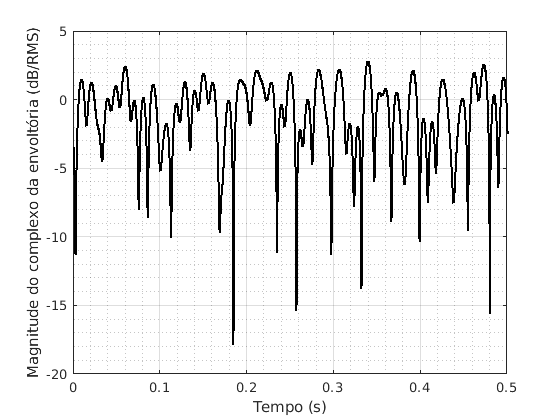

In [77]:
filename = 'Clarke.mat'; %carregando o arquivo
delimiterIn = ' '; %espaçamento entre amostras
headerlinesIn = 1; %Pular a linha de cabeçalho
A = importdata(filename,delimiterIn,headerlinesIn); % importa arquivo

ts=50e-6; %taxa de amostragem Fs


amostras=A.h; % amostras do sinal
Nd=length(amostras); % número de amostras
timeaxis=[1:Nd]*ts; % tempo espaçamento

%% Calculando a magnitude da envoltoria complexa/ RMS
rmsr=sqrt(std(abs(amostras))^2+mean(abs(amostras))^2);      
rrho=abs(amostras)/rmsr; % Obtendo o valor absoluto de Rho                          

%% LCR Calculado

SERIES=20*log10(rrho);
axiss=[ceil(min(SERIES))+1:floor(max(SERIES))-1]; % cria o array, iniciando do mínimo até o máximo, das amostras absoluto. Por fim, arendonda o valor para o valor acima mais próximo, tornando-o um inteiro.
b=20*log10(abs(amostras));
for i=1:length(axiss)                             
    LCR_emp(1,i) = LCR_(b, axiss(i), ts);
end

%% LCR Teórico 
lcrtheoretical = sqrt(2*pi)*10.^(axiss./20).*exp(-10.^(axiss./10)); 

%% AFD calculado
for i=1:length(axiss)                             
    AFD_emp(1,i) = AFD_(b, axiss(i), ts);
end

%% AFD teórico
afdtheoretical = (exp(10.^(axiss./10))-1)./(sqrt(2*pi)*10.^(axiss./20)); 

%% Calculo da frequência doppler
fd_lcr = LCR_emp./lcrtheoretical;
fd_afd = afdtheoretical./AFD_emp;

%% Plot fading
figure;
plot(timeaxis,10*log10(rrho),'k','LineWidth',1.5)
grid on
xlabel('Tempo (s)') 
ylabel('Magnitude do complexo da envoltória (dB/RMS)')
grid minor
axis([0 0.5 -20 5])
%




A figura acima mostra a série temporal do desvanecimento de pequena escala gerado sinteticamente com espalhamento _Doppler_.

Após a geração do sinal, faz-se o uso do método da máxima verossimilhança para estimação dos parâmetros do canal e geração da PDF e CDF.

Abra um novo script no Matlab para gerar a função de cálculo da **PDF** e da **CDF**, salve-o como **cdf.m** e escreva o seguinte código:

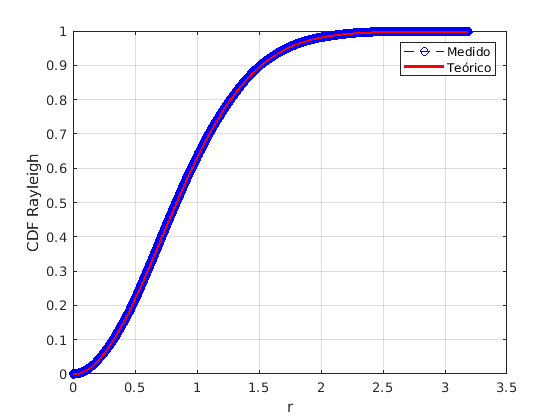

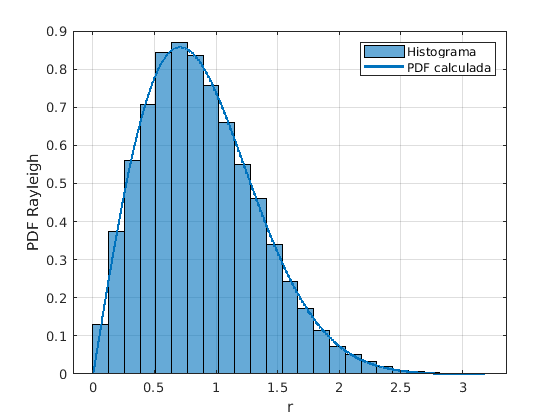

In [68]:
%%Cálculo da CDF
%clc; clear; close all;
filename = 'Clarke.mat';
delimiterIn = ' ';
headerlinesIn = 1;
A = importdata(filename,delimiterIn,headerlinesIn);
vtFadingEst = A.h;
dSigma = raylfit(abs(vtFadingEst),'alpha');
%% CDF RAYLEIGH
[dF1,dX1] = ecdf(abs(vtFadingEst));
vtCdfray=raylcdf(dX1,dSigma);

%Plot da CDF
a = figure;
plot(dX1,dF1,'b--o')
hold on
plot(dX1,vtCdfray,'r','linewidth', 2)
ylabel('CDF Rayleigh')
xlabel('r')
legend('Medido','Teórico')
grid on
%% PDF Rayleigh
vtPdfray = raylpdf(dX1,dSigma);
b = figure;
histogram(abs(vtFadingEst),25,'Normalization','pdf')
line(dX1,vtPdfray,'linewidth', 2)
legend('Histograma','PDF calculada')
xlabel('r')
ylabel('PDF Rayleigh')
grid on

Para calcular o **_sigma_**, foi feito o uso da função **Raylfit(data,alpha)**, a qual retorna a estimativa de máxima verossimilhança e o intervalo de confiança de 100(1 - alpha)% dados os dados.
Enquanto que para o cáculo da **CDF** fez-se o uso da função **_raylcdf_** raylcdf(x,b) retorna a CDF da distribuição Rayleigh cdf em cada valor em x usando o parâmetro de escala correspondente, b.
A PDF estimada do desvanecimento foi gerada com o histograma das amostras do sinal, enquanto que a teórica foi feita com o **σ** estimado.mostrando boa convergência dos resultados.

# Parte 3: Estimação do Doppler do canal

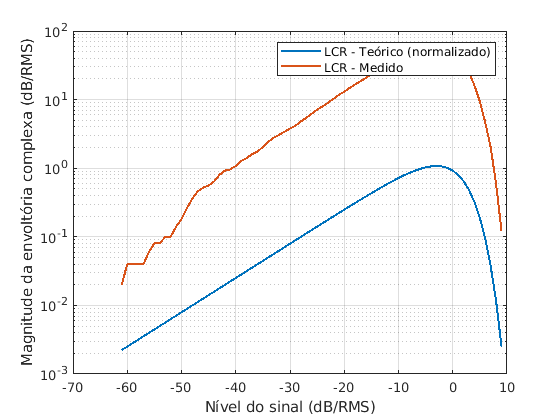

In [69]:
%% Plot LCR
figure,semilogy(axiss,lcrtheoretical,axiss,LCR_emp,'LineWidth',1.5)
xlabel('Nível do sinal (dB/RMS)') 
ylabel('Magnitude da envoltória complexa (dB/RMS)')
legend('LCR - Teórico (normalizado)','LCR - Medido')
grid on
%

As curvas geradas possuem valores maiores que os valores normalizados, pois estão relacionadas a velocidades relativas entre os terminais, o que ocasiona um espalhamento Doppler.

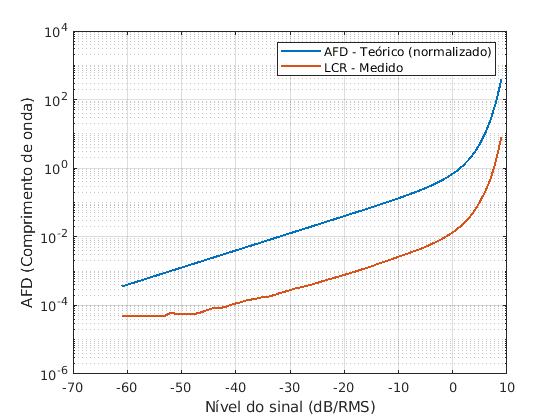

In [70]:
%% Plot AFD
figure,semilogy(axiss,afdtheoretical,axiss,AFD_emp,'LineWidth',1.5);
grid on
xlabel('Nível do sinal (dB/RMS)') 
ylabel('AFD (Comprimento de onda)') 
legend('AFD - Teórico (normalizado)','LCR - Medido')
grid on
%

Como a curva medida possui uma frequência _Doppler_, sua variação temporal é maior que a curva
normalizada. Por este motivo o tempo médio que o sinal fica abaixo do valor R é menor.
Isso ocorre pela maior variabilidade temporal do sinal com Doppler mais alto.

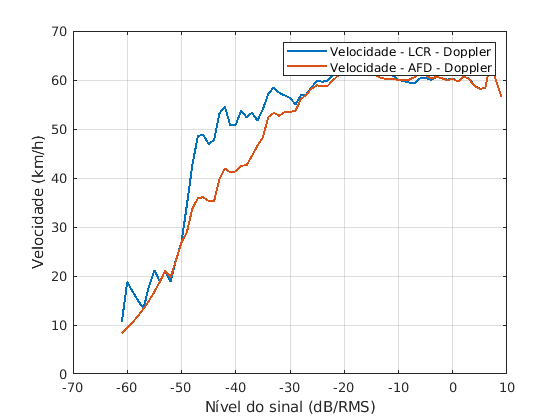

In [71]:
%% Velocidade
figure,plot(axiss,fd_lcr*lambda*3.6,axiss,fd_afd*lambda*3.6,'LineWidth',1.5)
xlabel('Nível do sinal (dB/RMS)')
ylabel('Velocidade (km/h)')
legend('Velocidade - LCR - Doppler','Velocidade - AFD - Doppler')
grid on

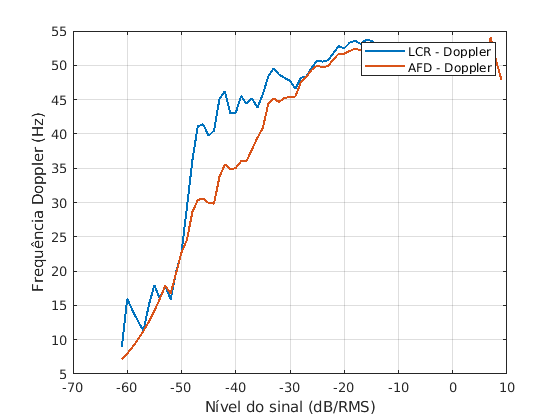

In [72]:
%% Plot frequência doppler
figure,plot(axiss,fd_lcr,axiss,fd_afd,'LineWidth',1.5)
xlabel('Nível do sinal (dB/RMS)')
ylabel('Frequência Doppler (Hz)')
legend('LCR - Doppler','AFD - Doppler')
grid on

Pela figura acima, observa-se que variabilidade da frequência Doppler ao longo da intensidade do sinal que, para valores abaixo de -35 dB/RMS, a precisão decai pela pouca quantidade de amostras abaixo desse valor. Contudo, a convergência ocorre para uma faixa de valores de R entre -30 e -5 dB/RMS. Vale ressaltar que, nesse caso, o sinal possui um número elevado de amostras, o que nem sempre é possível de se obter em casos reais,por limitação física dos hardwares.

In [73]:
opengl('save', 'software');

### Referências 

[1] (https://repositorio.ufrn.br/jspui/bitstream/123456789/28236/1/Caracterizacaocanalutilizando_Leite_2019.pdf) \
[2] (https://www.rfwireless-world.com/Terminology/Level-Crossing-Rate-vs-Average-Fade-Duration.html) \
